## Import Libraries

In [1]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk import pos_tag
from textblob import TextBlob

## Ingest Data

In [2]:
indeed_df = pd.read_csv('data/indeed_spider.csv')

In [3]:
indeed_df.dropna(subset=['job_description'], inplace=True)
indeed_df['job_description'] = indeed_df['job_description'].astype(str)

In [4]:
indeed_df['job_description_analysis'] = indeed_df['job_description'].str.lower()
indeed_df['job_description_analysis'] = indeed_df['job_description_analysis'].apply(lambda row: TextBlob(row).words)

## Remove irrelevant words

In [5]:
stop = stopwords.words('english')
additional_stop_words = ['business','new','team','company','equal','opportunity','gender','orientation',
                        'religion','sex','national','origin','sexual','identity','marital','status','race',
                        'color','employee','work','experience','product','role', 'organization', 'job',
                        'description', 'age', 'disability', 'use']
stop.extend(additional_stop_words)
indeed_df['job_description_analysis'] = indeed_df['job_description_analysis'].apply(lambda row: 
                                                                                   [wd for wd in row if wd not in stop])

## Filter out non-Nouns (NN)

In [6]:
indeed_df['parts_of_speech'] = indeed_df['job_description_analysis'].apply(lambda wd: pos_tag(wd)) 
indeed_df['relevant_words'] = indeed_df['parts_of_speech'].apply(lambda row: [wd[0] for wd in row if wd[1]=='NN'])

## Produce a Na&#239;ve Word Cloud

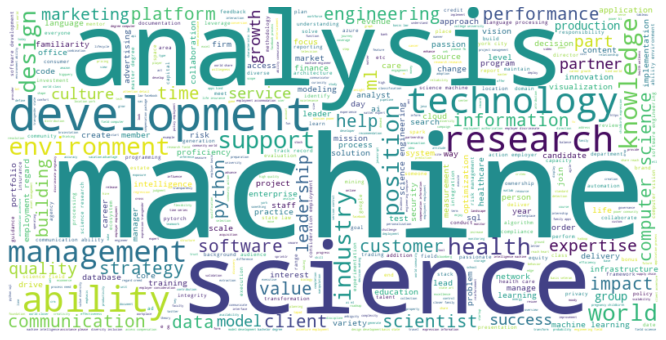

In [7]:
indeed_df['words_for_WC'] = indeed_df['relevant_words'].apply(lambda row: ' '.join(row))
from wordcloud import WordCloud
wc = WordCloud(background_color="white", max_words=2000, width=800, height=400)
# generate word cloud
wc.generate(' '.join(indeed_df['words_for_WC']))
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()